<a href="https://colab.research.google.com/github/chusshoo22/Chusshoo-24/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/vehicles.csv/vehicles.csv')

In [4]:
df.shape

(426880, 26)

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [8]:
import matplotlib.pyplot as plt


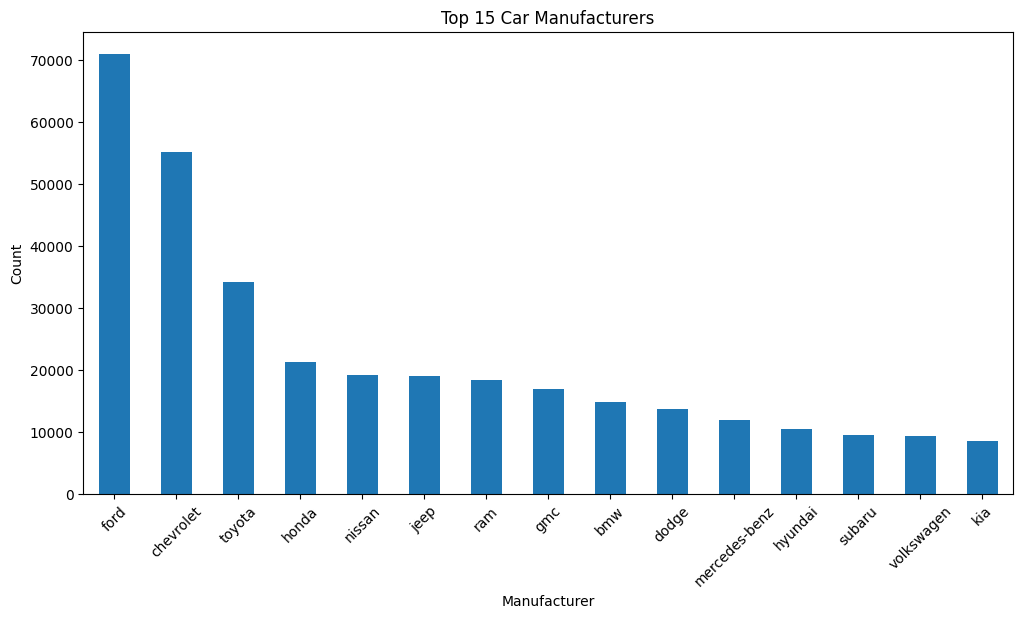

In [9]:
plt.figure(figsize=(12,6))
df['manufacturer'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
import seaborn as sns

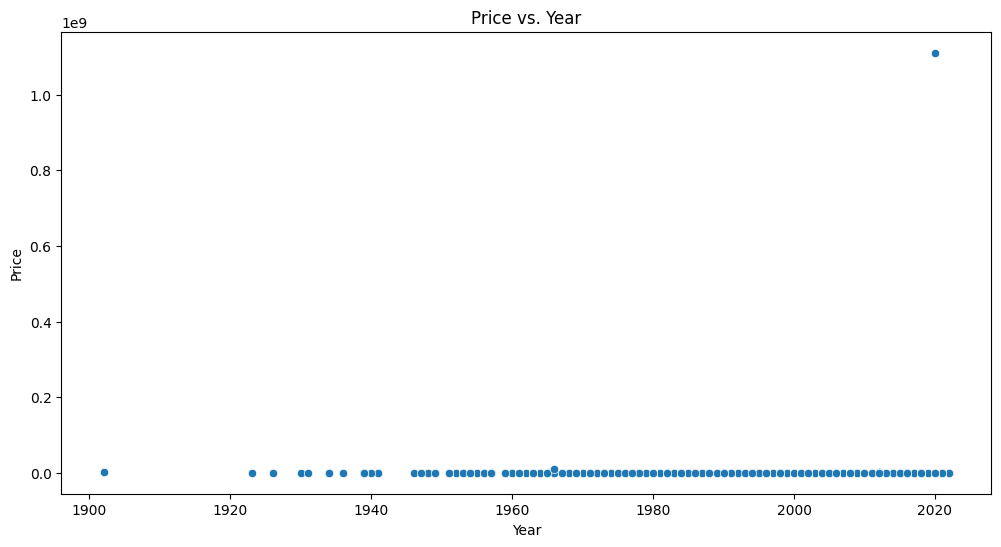

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='year', y='price', data=df.sample(10000))
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

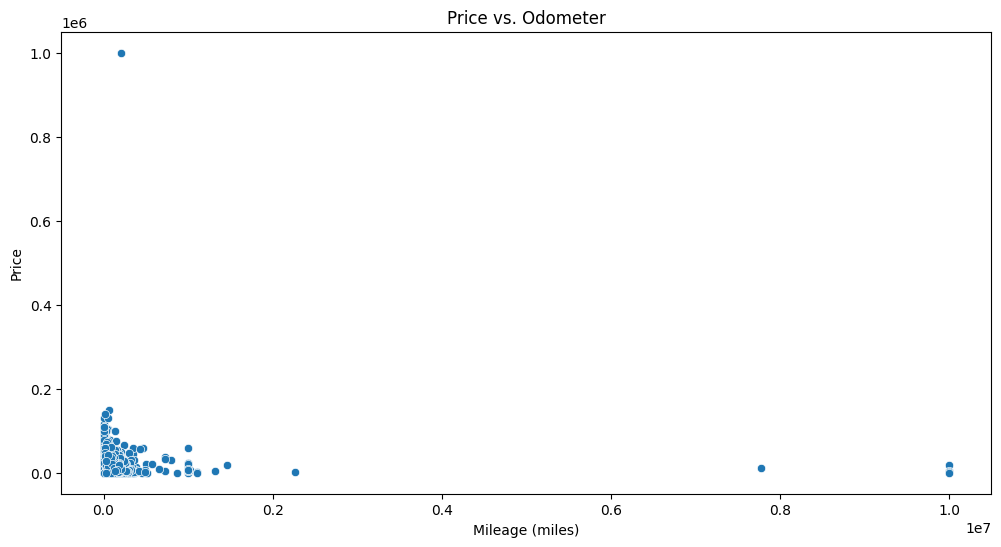

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer', y='price', data=df.sample(10000))
plt.title('Price vs. Odometer')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price')
plt.show()

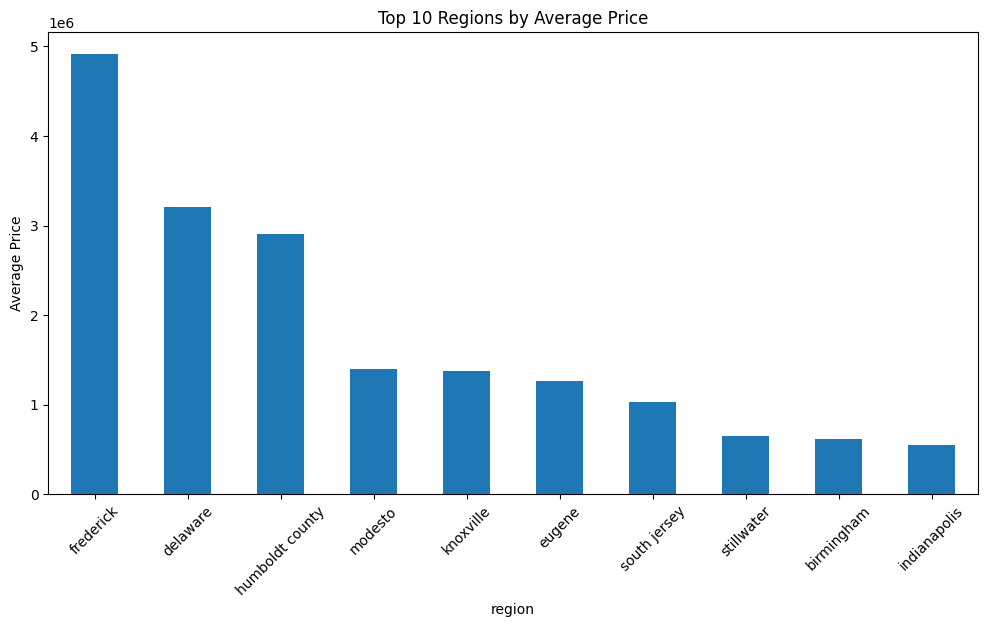

In [15]:
region_price = df.groupby('region')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
region_price.plot(kind='bar')
plt.title('Top 10 Regions by Average Price')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

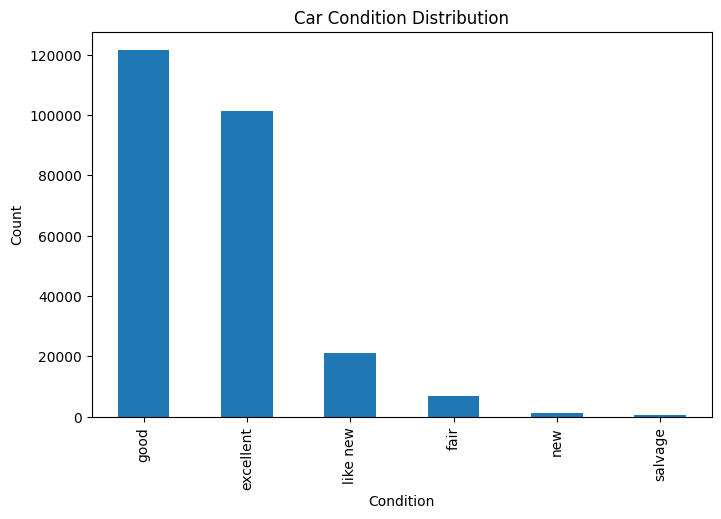

In [16]:
plt.figure(figsize=(8,5))
df['condition'].value_counts().plot(kind='bar')
plt.title('Car Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [17]:
df.isnull().sum() / len(df) * 100

,0
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470


In [18]:
# Drop columns with >40% missing
missing_percent = df.isnull().sum() / len(df) * 100
drop_cols = missing_percent[missing_percent > 40].index
df.drop(drop_cols, axis=1, inplace=True)

# Drop rows missing critical info
df = df.dropna(subset=['year', 'manufacturer', 'model'])

# Remove outliers
df = df[(df['price'] > 100) & (df['price'] < 100000)]
df = df[df['year'].between(1950, 2022)]
df = df[df['odometer'] < 500000]

# Fill categorical with mode
cat_cols = ['fuel', 'transmission', 'title_status']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numeric with median
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['lat'] = df['lat'].fillna(df['lat'].median())
df['long'] = df['long'].fillna(df['long'].median())


In [19]:
# Create car age
df['car_age'] = 2025 - df['year']

# Clean cylinders
if 'cylinders' in df.columns:
    df['cylinders'] = df['cylinders'].str.extract('(\d+)').fillna(0).astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366240 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            366240 non-null  int64  
 1   url           366240 non-null  object 
 2   region        366240 non-null  object 
 3   region_url    366240 non-null  object 
 4   price         366240 non-null  int64  
 5   year          366240 non-null  float64
 6   manufacturer  366240 non-null  object 
 7   model         366240 non-null  object 
 8   fuel          366240 non-null  object 
 9   odometer      366240 non-null  float64
 10  title_status  366240 non-null  object 
 11  transmission  366240 non-null  object 
 12  VIN           230053 non-null  object 
 13  drive         256475 non-null  object 
 14  type          290480 non-null  object 
 15  paint_color   259455 non-null  object 
 16  image_url     366240 non-null  object 
 17  description   366238 non-null  object 
 18  state   

In [22]:
features = [
    'car_age',
    'odometer',
    'cylinders',
    'manufacturer',
    'model',
    'fuel',
    'transmission',
    'drive',
    'type',
    'paint_color',
    'state'
]

# Only keep columns that still exist
features = [col for col in features if col in df.columns]

X = df[features]
y = df['price']


In [24]:
# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [25]:
cat_cols = ['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state']

for col in cat_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
import numpy as np


In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression")
print(f"MAE: {mean_absolute_error(y_test, lr_preds):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_preds)):,.2f}")
print(f"R^2: {r2_score(y_test, lr_preds):.4f}")

Linear Regression
MAE: 8,264.52
RMSE: 11,155.39
R^2: 0.3863


In [30]:


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest")
print(f"MAE: {mean_absolute_error(y_test, rf_preds):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_preds)):,.2f}")
print(f"R^2: {r2_score(y_test, rf_preds):.4f}")

Random Forest
MAE: 2,098.10
RMSE: 4,671.03
R^2: 0.8924


In [31]:

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost")
print(f"MAE: {mean_absolute_error(y_test, xgb_preds):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_preds)):,.2f}")
print(f"R^2: {r2_score(y_test, xgb_preds):.4f}")

XGBoost
MAE: 3,534.48
RMSE: 5,901.79
R^2: 0.8282


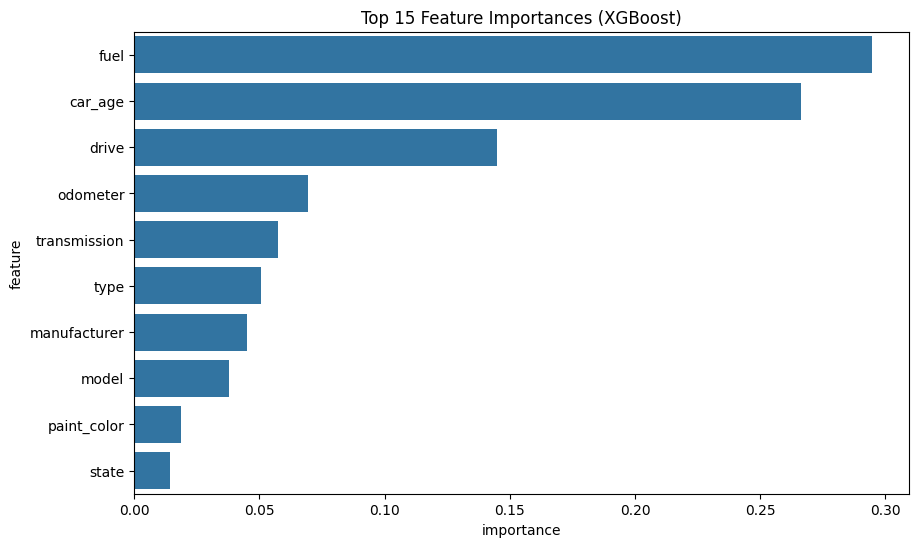

In [32]:
importances = xgb.feature_importances_
features_list = X.columns

importance_df = pd.DataFrame({'feature': features_list, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Top 15 Feature Importances (XGBoost)')
plt.show()